# Data Collection

In [79]:
import pandas as pd
from lxml import etree

trainCsv = pd.read_csv("train.csv")
texts= []
labels = []
ids = []

for line in trainCsv.values:
   
    ids.append(line[0])
    xml_file = etree.parse("data/"+line[1])
    file_text = xml_file.xpath("/BODY")[0].text or ''
    texts.append(file_text)
    labels.append(line[2])


collectFrame = pd.DataFrame()
collectFrame["docId"] = ids
collectFrame["text"] = texts
collectFrame["docLabel"] = labels

trainDF = pd.DataFrame()
trainDF["docId"] = ids
trainDF["cat"] = labels

#trainDF
#collectFrame


# Tokenization

In [80]:
import nltk
nltk.download('punkt')

corpus  = []
for doc in texts:
    words = nltk.word_tokenize(doc)
    corpus = corpus+words   
#corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ameli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words ='english',max_features=100)
matrice = vectorizer.fit_transform(texts)
matrix = matrice.toarray()
matindex = matrice.toarray()
#print(matrix)

In [75]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
Matrix = StandardScaler().fit_transform(matrix)


#2D
PCA = PCA(n_components=2)
#Reduire les dimensions de la matrice  de base pour l afficher sur un repere
ComponentsTransformed = PCA.fit_transform(Matrix)
#ComponentsTransformed


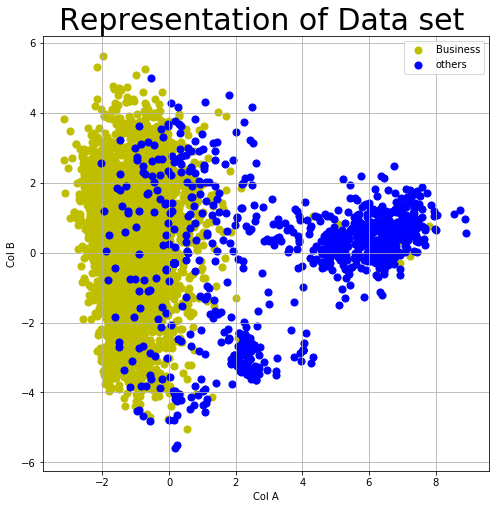

In [50]:
figure = plt.figure(figsize=(8,8))
plan = figure.add_subplot(1,1,1)

plan.set_xlabel('Col A',fontsize=10)
plan.set_ylabel('Col B',fontsize=10)
plan.set_title("Representation of Data set ", fontsize= 30)

legend=['Business','others']
legend_indice = [0,1]
colors=['y','b']

for color,indice in zip(colors,legend_indice):
    indices=collectFrame['docLabel'] == indice
    plan.scatter(ComponentsTransformed[indices,0],ComponentsTransformed[indices,1],c=color,s=50)
plan.legend(legend)
plan.grid()



# Classification

In [121]:
#classification with Knn
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
#print labels
x_train, x_test, y_train, y_test=train_test_split(matindex,labels, test_size=0.20)
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

prediction = classifier.predict(x_test)

from sklearn import svm
classification = svm.SVC(gamma='scale')
classification.fit(x_train,y_train)
predictionSVM = classification.predict(x_test)

#print prediction

# Evaluation

In [124]:
from sklearn.metrics import classification_report,confusion_matrix
# Evalution Knn
print "Without normalization"
print "KNN "
print(classification_report(y_test,prediction))

#Evaluation SVM

print "SVM"
print(classification_report(y_test,predictionSVM))



Without normalization
KNN 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       770
           1       0.92      0.83      0.87       190

   micro avg       0.95      0.95      0.95       960
   macro avg       0.94      0.90      0.92       960
weighted avg       0.95      0.95      0.95       960

SVM
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       770
           1       0.94      0.82      0.88       190

   micro avg       0.95      0.95      0.95       960
   macro avg       0.95      0.90      0.92       960
weighted avg       0.95      0.95      0.95       960

